In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

df=pd.read_excel("/content/drive/MyDrive/Car Evaluation.xls")

In [108]:
df.shape

(1727, 7)

In [109]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class'], dtype='object')

In [110]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


###So we can see that the all the features are of Object type.

In [112]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

###so there is no null values in our dataset

In [113]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [114]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

#Univariate anylasis

In [115]:
df.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

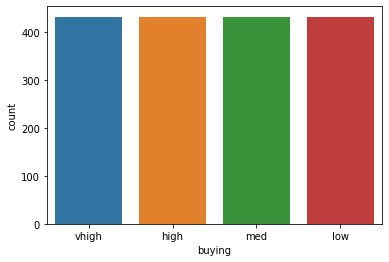

In [116]:
sns.countplot(df['buying'])

###So we can see that all the fields are balanced.

In [117]:
for col in df.columns:
  print(col+":")
  print(df[col].unique())
  

buying:
['vhigh' 'high' 'med' 'low']
maint:
['vhigh' 'high' 'med' 'low']
doors:
['2' '3' '4' '5more']
persons:
['2' '4' 'more']
lug_boot:
['small' 'med' 'big']
safety:
['med' 'high' 'low']
Class:
['unacc' 'acc' 'vgood' 'good']


###so converting '5more' to 5 and 'more' to 5

In [118]:
df['doors']=df['doors'].replace({'5more':'5'})
df['persons']=df['persons'].replace({'more':'5'})

#Lable encoding 

In [119]:
df_label = df.apply(LabelEncoder().fit_transform)# vgood-->3,good-->1,unacc-->2,acc-->0
df_label.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [120]:
X_label=df_label.drop('Class',axis=1)
y_label=df_label['Class']

#Ordinal encoding

In [121]:
dict1={'vhigh' : 3,'high':2 ,'med':1 ,'low':0}
dict2={'2':0,'3':1,'4':2,'5':3}
dict3={'small':0,'med':1,'big':2}
dict4={'2':0,'4':1,'5':2}
dict5={'med':1,'high':2 ,'low':0}
dict6={'unacc':2,'vgood':3 ,'good':1,'acc':0}

df_O=df.copy()
df_O['buying']=df_O['buying'].map(dict1)
df_O['maint']=df_O['maint'].map(dict1)
df_O['doors']=df_O['doors'].map(dict2)
df_O['lug_boot']=df_O['lug_boot'].map(dict3)
df_O['persons']=df_O['persons'].map(dict4)
df_O['safety']=df_O['safety'].map(dict1)
df_O['Class']=df_O['Class'].map(dict6)
df_O.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,0,1,2
1,3,3,0,0,0,2,2
2,3,3,0,0,1,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [122]:
X_O=df_O.drop('Class',axis=1)
y_O=df_O['Class']

#Count or Frequency encoding

In [ ]:
D1=df['buying'].value_counts().to_dict()
D2=df['maint'].value_counts().to_dict()
D3=df['doors'].value_counts().to_dict()
D4=df['persons'].value_counts().to_dict()
D5=df['lug_boot'].value_counts().to_dict()
D6=df['safety'].value_counts().to_dict()
dict7={'unacc':2,'vgood':3 ,'good':1,'acc':0}


df_GO=df.copy()
df_GO['buying']=df_GO['buying'].map(D1)
df_GO['maint']=df_GO['maint'].map(D2)
df_GO['doors']=df_GO['doors'].map(D3)
df_GO['lug_boot']=df_GO['lug_boot'].map(D5)
df_GO['persons']=df_GO['persons'].map(D4)
df_GO['safety']=df_GO['safety'].map(D6)
df_GO['Class']=df_GO['Class'].map(dict7)
df_GO.head()

In [124]:
X_GO=df_GO.drop('Class',axis=1)
y_GO=df_GO['Class']

#Mean Encoding

In [125]:
'''
D1=df.groupby(['buying'])['Class'].mean().to_dict()
D2=df.groupby(['maint'])['Class'].mean().to_dict()
D3=df.groupby(['doors'])['Class'].mean().to_dict()
D4=df.groupby(['lug_boot'])['Class'].mean().to_dict()
D5=df.groupby(['persons'])['Class'].mean().to_dict()
D6=df.groupby(['safety'])['Class'].mean().to_dict()
dict7={'unacc':2,'vgood':3 ,'good':1,'acc':0}

df_ME=df.copy()
df_ME['buying']=df_ME['buying'].map(D1)
df_ME['maint']=df_ME['maint'].map(D2)
df_ME['doors']=df_ME['doors'].map(D3)
df_ME['lug_boot']=df_ME['lug_boot'].map(D4)
df_ME['persons']=df_ME['persons'].map(D5)
df_ME['safety']=df_ME['safety'].map(D6)
df_ME['Class']=df_ME['Class'].map(dict7)
df_ME
'''




"\nD1=df.groupby(['buying'])['Class'].mean().to_dict()\nD2=df.groupby(['maint'])['Class'].mean().to_dict()\nD3=df.groupby(['doors'])['Class'].mean().to_dict()\nD4=df.groupby(['lug_boot'])['Class'].mean().to_dict()\nD5=df.groupby(['persons'])['Class'].mean().to_dict()\nD6=df.groupby(['safety'])['Class'].mean().to_dict()\ndict7={'unacc':2,'vgood':3 ,'good':1,'acc':0}\n\ndf_ME=df.copy()\ndf_ME['buying']=df_ME['buying'].map(D1)\ndf_ME['maint']=df_ME['maint'].map(D2)\ndf_ME['doors']=df_ME['doors'].map(D3)\ndf_ME['lug_boot']=df_ME['lug_boot'].map(D4)\ndf_ME['persons']=df_ME['persons'].map(D5)\ndf_ME['safety']=df_ME['safety'].map(D6)\ndf_ME['Class']=df_ME['Class'].map(dict7)\ndf_ME\n"

#Random Forest

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X_label,y_label,test_size=0.33,random_state=42)
print("Train Data = ",(X_train.shape,y_train.shape))
print("Test Data = ",(X_test.shape,y_test.shape))

Train Data =  ((1157, 6), (1157,))
Test Data =  ((570, 6), (570,))


In [127]:
from sklearn.ensemble import RandomForestClassifier
R_model=RandomForestClassifier()
R_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
y_pred=R_model.predict(X_test)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       127
           1       0.86      0.67      0.75        18
           2       0.98      1.00      0.99       399
           3       0.80      0.92      0.86        26

    accuracy                           0.96       570
   macro avg       0.90      0.87      0.88       570
weighted avg       0.96      0.96      0.96       570



#Ordinal encoding

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X_O,y_O,test_size=0.33,random_state=42)
print("Train Data = ",(X_train.shape,y_train.shape))
print("Test Data = ",(X_test.shape,y_test.shape))

Train Data =  ((1157, 6), (1157,))
Test Data =  ((570, 6), (570,))


In [131]:
from sklearn.ensemble import RandomForestClassifier
R_model=RandomForestClassifier()
R_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
y_pred=R_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       127
           1       0.81      0.72      0.76        18
           2       1.00      1.00      1.00       399
           3       0.79      0.85      0.81        26

    accuracy                           0.97       570
   macro avg       0.89      0.88      0.88       570
weighted avg       0.97      0.97      0.97       570



#Count or Frequency encoding

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X_GO,y_GO,test_size=0.33,random_state=42)
print("Train Data = ",(X_train.shape,y_train.shape))
print("Test Data = ",(X_test.shape,y_test.shape))

Train Data =  ((1157, 6), (1157,))
Test Data =  ((570, 6), (570,))


In [134]:
from sklearn.ensemble import RandomForestClassifier
R_model=RandomForestClassifier()
R_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
y_pred=R_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.88      0.71       127
           1       0.00      0.00      0.00        18
           2       0.96      0.92      0.94       399
           3       0.00      0.00      0.00        26

    accuracy                           0.84       570
   macro avg       0.39      0.45      0.41       570
weighted avg       0.81      0.84      0.82       570



#Overall results

In [140]:
comparision={'Encoding methods used':['Label encoding','Ordinal encoding','frequency encoding'],
            'Test_Accuracy':[0.96,0.97,0.84]
             };

In [141]:
df=pd.DataFrame(comparision)
df

,Encoding methods used,Test_Accuracy
0,Label encoding,0.96
1,Ordinal encoding,0.97
2,frequency encoding,0.84


#So Ordinal encoding is giving the best result